In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotilb inline

In [3]:
train_data=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/train.csv')
test_data=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/fillna_test.csv')
col_train=['time', 'year', 'month', 'day', 'hour', 'min', 's', 'tem_out', 'hum_out', 'air_out',
       'hum_in', 'air_in','temperature']
col_test=['time', 'year', 'month', 'day', 'hour', 'min', 's', 'tem_out', 'hum_out', 'air_out',
       'hum_in', 'air_in']
train_data.columns=col_train
test_data.columns=col_test

train_data.fillna(method='ffill',inplace=True)

In [4]:
sets=train_data[train_data['min'].isin([0,30])].reset_index(drop=True)
for i in np.arange(1,20):
    plus=train_data[train_data['min'].isin([i,i+30])]
    sets=sets.append(plus)

for i in np.arange(50,60):
    plus=train_data[train_data['min'].isin([i,i-30])]
    sets=sets.append(plus)


In [5]:
train_data=sets.reset_index(drop=True)  

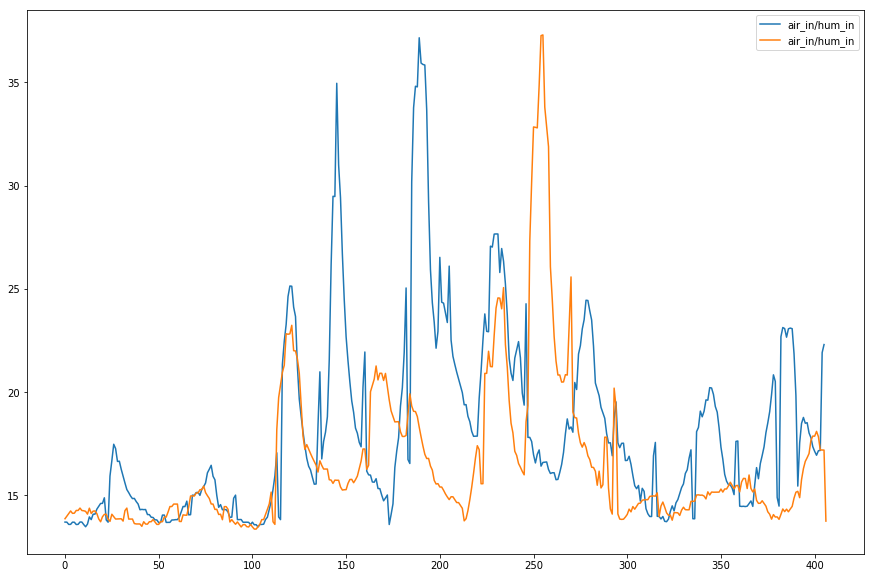

In [74]:
fig,axes=plt.subplots(figsize=(15,10))
data.iloc[len(data)-406:,:].reset_index(drop=True).plot(y='air_in/hum_in',ax=axes)
data.iloc[406:813,:].reset_index(drop=True).plot(y='air_in/hum_in',ax=axes)
# plt.hlines(15,0, 800, colors = "b", linestyles = "dashed")
# plt.vlines(406,0, 35, colors = "b", linestyles = "dashed")

In [6]:
train_data['min']=train_data['min'].apply(lambda x:30 if 20<=x<50 else 0)
test_data['min']=test_data['min'].apply(lambda x:30 if 20<=x<50 else 0)
data=train_data.append(test_data).reset_index(drop=True)

data['air_out']=data['air_out'].apply(lambda x:None if x<950 or x>1050 else x)
data['air_in']=data['air_in'].apply(lambda x:None if x<960 or x>1050 else x)
data['air_out'].fillna(method='ffill',inplace=True)
data['air_in'].fillna(method='ffill',inplace=True)

data['hum_subtract']=data['hum_in']-data['hum_out']
data['hum_subtract']=data['hum_subtract'].apply(lambda x:None if x>16 else x)
data['hum_subtract'].fillna(method='ffill',inplace=True)
data['air_subtract']=data['air_in']-data['air_out']
data['air_subtract']=data['air_subtract'].apply(lambda x:None if x<-5 or x>5 else x)
data['air_subtract'].fillna(method='ffill',inplace=True)
data['tem_subtract']=data['temperature']-data['tem_out']


data['s_hight_tem_out']=data['tem_out'].apply(lambda x: 1 if x>25 else 0)
data['s_hight_hum_out']=data['hum_out'].apply(lambda x: 1 if x>83 else 0)
data['s_hight_hum_in']=data['hum_in'].apply(lambda x: 1 if x>83 else 0)

data['date']=data['day'].apply(lambda x: x+31 if x<14 else x)-13

data['hum_out-30/5']=(data['hum_out']-30)/-5+26
data['hum_in-30/4']=(data['hum_in']-30)/-4+27.5
data['air_in-950/2.5']=(data['air_in']-950)/-2+35
data['air_in/hum_in']=data['air_in']/data['hum_in']*0.9+3.6

C:\Users\ZC7\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [7]:
month_bin_dummies_df = pd.get_dummies(data['month']).rename(columns=lambda x: 'month_' + str(x))
data = pd.concat([data, month_bin_dummies_df], axis=1)

hour_bin_dummies_df = pd.get_dummies(data['hour']).rename(columns=lambda x: 'hour_' + str(x))
data = pd.concat([data, hour_bin_dummies_df], axis=1)

min_bin_dummies_df = pd.get_dummies(data['min']).rename(columns=lambda x: 'min_' + str(x))
data = pd.concat([data, min_bin_dummies_df], axis=1)

In [8]:
data.shape

(25903, 52)

In [9]:
data.drop(['air_out','day','hour','min','month','s','time','year','temperature'],axis=1,inplace=True)
# data.drop(['air_out','day','min','month','s','time','year'],axis=1,inplace=True)

In [38]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() #实例化
# result=scaler.fit_transform(data[['air_in','hum_in','hum_out','tem_out','hum_subtract','air_subtract','date', 'hum_out-30/5', 'hum_in-30/4', 'air_in-950/2.5', 'air_in/hum_in']]) 
# # data.drop(['air_in','hum_in','hum_out','tem_out','hum_subtract','air_subtract','date', 'hum_out-30/5', 'hum_in-30/4', 'air_in-950/2.5', 'air_in/hum_in'],axis=1,inplace=True)
# result=pd.DataFrame(result)
# scaler_col=['air_in','hum_in','hum_out','tem_out','hum_subtract','air_subtract','date', 'hum_out-30/5', 'hum_in-30/4', 'air_in-950/2.5', 'air_in/hum_in']
# result.columns=scaler_col
# data[scaler_col]=result

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler() #实例化
# result=scaler.fit_transform(data[['air_in','hum_in','hum_out','tem_out','hum_subtract','air_subtract','date', 'hum_out-30/5', 'hum_in-30/4', 'air_in-950/2.5', 'air_in/hum_in']]) 
# # data.drop(['air_in','hum_in','hum_out','tem_out','hum_subtract','air_subtract','date', 'hum_out-30/5', 'hum_in-30/4', 'air_in-950/2.5', 'air_in/hum_in'],axis=1,inplace=True)
# result=pd.DataFrame(result)
# scaler_col=['air_in','hum_in','hum_out','tem_out','hum_subtract','air_subtract','date', 'hum_out-30/5', 'hum_in-30/4', 'air_in-950/2.5', 'air_in/hum_in']
# result.columns=scaler_col
# data[scaler_col]=result

In [9]:
data.shape

(25903, 43)

In [11]:
train=data.loc[:(len(data)-len(test_data)-1),:]
test=data.loc[(len(data)-len(test_data)):,:]
train_sk=train.drop(['tem_subtract'],axis=1)
train_sk_label=train[['tem_subtract']]
test_sk=test.drop(['tem_subtract'],axis=1).reset_index(drop=True)

In [49]:
from sklearn.linear_model import RANSACRegressor#稳健回归
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge#岭回归
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
import lightgbm as lgbm
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(train_sk,train_sk_label,test_size=0.0333,shuffle=False)
lr=LinearRegression()
ran=RANSACRegressor(random_state=42)
ridge=Ridge(random_state=42,alpha=70.5,solver='sag')
kn=KNeighborsRegressor(weights='distance',n_neighbors=7,leaf_size=46)
lgbm1 = lgbm.sklearn.LGBMRegressor(max_depth=7)
# rf=RandomForestRegressor(random_state=42)
params = {
    #           boosting_type': 'gbdt', 
#           'objective': 'multiclass', 
          'nthread': -1, 
          'silent': True,
          'learning_rate': 0.1, 
          'num_leaves': 50, 
          'max_depth': 4,
          'max_bin': 127, 
          'subsample_for_bin': 50000,
          'subsample': 0.8, 
          'subsample_freq': 1, 
          'colsample_bytree': 0.8, 
          'reg_alpha': 1, 
          'reg_lambda': 0,
          'min_split_gain': 0.0, 
          'min_child_weight': 1, 
          'min_child_samples': 20, 
          'scale_pos_weight': 1}

lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,feature_fraction=0.9,min_data_in_leaf=35)

# lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,feature_fraction=0.9,min_data_in_leaf=25)
# lgbm1 = lgbm.sklearn.LGBMRegressor(max_depth=4,min_data_in_leaf=18,max_bin=38)
# lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,min_data_in_leaf=20)

lgbm1.fit(train_sk,train_sk_label)
# lr.fit(Xtrain,Ytrain)
# ran.fit(Xtrain,Ytrain)
# ridge.fit(Xtrain,Ytrain)
# kn.fit(Xtrain,Ytrain)
lr.fit(train_sk,train_sk_label)
ran.fit(train_sk,train_sk_label)
ridge.fit(train_sk,train_sk_label)
kn.fit(train_sk,train_sk_label)
rf.fit(train_sk,train_sk_label)

lr_label=lr.predict(Xtest)
ran_label=ran.predict(Xtest)
ridge_label=ridge.predict(Xtest)
kn_label=kn.predict(Xtest)
rf_label=rf.predict(Xtest)
lgbm_label=lgbm1.predict(Xtest)

lr_train_label=lr.predict(Xtrain)
ran_train_label=ran.predict(Xtrain)
ridge_train_label=ridge.predict(Xtrain)
kn_train_label=kn.predict(Xtrain)
rf_train_label=rf.predict(Xtrain)
lgbm_train_label=lgbm1.predict(Xtrain)

print("LR_test:",mean_squared_error(Ytest,lr_label),'---train:',mean_squared_error(Ytrain,lr_train_label))
print("稳健回归_test:",mean_squared_error(Ytest,ran_label),'---train:',mean_squared_error(Ytrain,ran_train_label))
print("岭回归_test:",mean_squared_error(Ytest,ridge_label),'---train:',mean_squared_error(Ytrain,ridge_train_label))
print("KNN_test:",mean_squared_error(Ytest,kn_label),'---train:',mean_squared_error(Ytrain,kn_train_label))
print("RF_test:",mean_squared_error(Ytest,rf_label),'---train:',mean_squared_error(Ytrain,rf_train_label))
print("LGBM_test:",mean_squared_error(Ytest,lgbm_label),'---train:',mean_squared_error(Ytrain,lgbm_train_label))

# lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,feature_fraction=0.9,min_data_in_leaf=25)
# LGBM_test: 0.027982820820366724 ---train: 0.028442290428576968  0.0423    0.14911

# lgbm1 = lgbm.sklearn.LGBMRegressor(max_depth=4,num_leaves=16,min_data_in_leaf=18,max_bin=38)
# LGBM_test: 0.030634381813852304 ---train: 0.03219235424300768   0.0455    0.14098

# lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,min_data_in_leaf=20)
# LGBM_test: 0.02749831911099148 ---train: 0.028540207318035183   0.04727   0.1591


# LGBM_test: 0.029113541938265243 ---train: 0.03128497148931523   0.0565    0.1487
# LGBM_test: 0.027664216462376233 ---train: 0.02842008570979548   0.04688



C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


LR_test: 0.06213728924358592 ---train: 0.06678810392204014
稳健回归_test: 0.09507321340897504 ---train: 0.10162203180343522
岭回归_test: 0.062127616574797845 ---train: 0.06681984669981962
KNN_test: 0.00013447852474323077 ---train: 0.00021724433582686405
RF_test: 0.04779547221631364 ---train: 0.05172525808910907
LGBM_test: 0.02776710813475667 ---train: 0.028472862304581528


In [50]:
lr_test_label=lr.predict(test_sk)
ran_test_label=ran.predict(test_sk)
ridge_test_label=ridge.predict(test_sk)
rf_test_label=rf.predict(test_sk)
kn_test_label=kn.predict(test_sk)
lgbm_test_label=lgbm1.predict(test_sk)

lr_test_label=pd.DataFrame(lr_test_label)[0]+test_sk['tem_out']
ran_test_label=pd.DataFrame(ran_test_label)[0]+test_sk['tem_out']
ridge_test_label=pd.DataFrame(ridge_test_label)[0]+test_sk['tem_out']
rf_test_label=pd.DataFrame(rf_test_label)[0]+test_sk['tem_out']
kn_test_label=pd.DataFrame(kn_test_label)[0]+test_sk['tem_out']
lgbm_test_label=pd.DataFrame(lgbm_test_label)[0]+test_sk['tem_out']

label_sift=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test_data/7_4_sift_all_grade_0.19649.csv')
# label_sift=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test_data/7_7_rf_all_minmaxscaler_0.1927.csv')
print("LR:",mean_squared_error(pd.DataFrame(lr_test_label),label_sift['temperature']))
print("RAN:",mean_squared_error(ran_test_label,label_sift['temperature']))
print("Ridge:",mean_squared_error(ridge_test_label,label_sift['temperature']))
print("RF:",mean_squared_error(rf_test_label,label_sift['temperature']))
print("KNN:",mean_squared_error(kn_test_label,label_sift['temperature']))
print("LGBM:",mean_squared_error(lgbm_test_label,label_sift['temperature']))
# LR: 3.6159759671817135e-06
# RAN: 0.03752776392428159
# Ridge: 0.0001728800545828104
# RF: 0.09064121754466953
# KNN: 0.11328048035461602
# SVM: 0.3903881573251393

# LR: 3.6159759671817135e-06
# RAN: 0.03752776392428159
# Ridge: 0.0001728800545828104
# RF: 0.05928485508159411
# KNN: 0.11328048035461602
# SVM: 0.3903881573251393


LR: 0.06341310959731415
RAN: 0.33741295079292327
Ridge: 0.061065935694880544
RF: 0.03901139364885311
KNN: 0.10843372387330921
LGBM: 0.046430761331521374


In [50]:
from sklearn.model_selection import KFold#设置交叉验证并定义损失度量
from sklearn.model_selection import TimeSeriesSplit
# Setup cross validation folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)
tscv = TimeSeriesSplit(n_splits=5)
#定义评价指标
def cv_rmse(model, X=train_data.drop(['temperature'],axis=1)):
    rmse = np.sqrt(-cross_val_score(model, X, train_data['temperature'],
                                    scoring="neg_mean_squared_error", cv=tscv))
    return (rmse)

from sklearn.model_selection import  RandomizedSearchCV
n_estimators =100
max_depth = np.arange(1,13,1)
min_samples_leaf=np.arange(2,10,1)
min_samples_split=np.arange(2,10,1)
param_grid= {'max_depth': max_depth, 'min_samples_leaf':min_samples_leaf, 
               'min_samples_split':min_samples_split}
gd=RandomizedSearchCV(rf,param_grid,verbose=True,cv=5,scoring = "mean_squared_error",n_jobs=-1)
gd.fit(train_sk,train_sk_label)
print(gd.best_params_)
gd.best_score_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.9s finished
C:\Users\ZC7\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'min_samples_split': 9, 'min_samples_leaf': 2, 'max_depth': 12}


-0.022456337444960107

In [26]:
gd.best_params_


{'weights': 'distance', 'n_neighbors': 7, 'leaf_size': 46}

0.04238391618160543 43


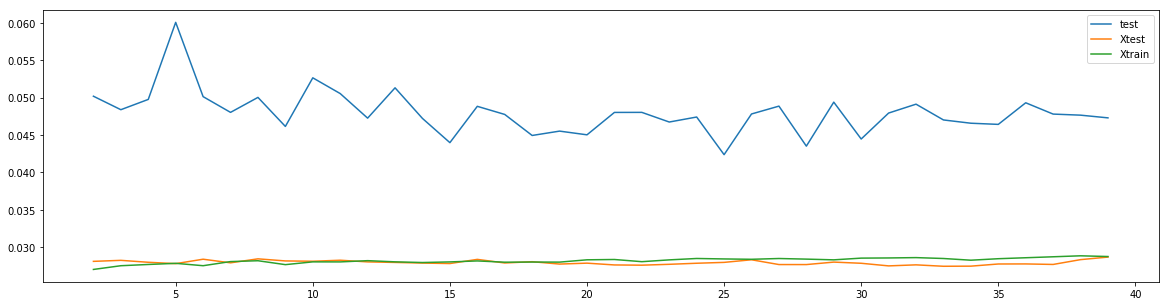

In [48]:
superpa_test = []
superpa_Xtrain = []
superpa_Xtest = []
mark=np.arange(2,40)
for i in mark:
# lgbm1 = lgbm.sklearn.LGBMRegressor(max_depth=4,num_leaves=16,min_data_in_leaf=18,max_bin=38)
 # lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,feature_fraction=0.9,min_data_in_leaf=25)   
#     lgbm1 = lgbm.sklearn.LGBMRegressor(max_depth=7,max_bin=33,)
    lgbm1 = lgbm.sklearn.LGBMRegressor(max_bin=33,max_depth=5,num_leaves=20,feature_fraction=0.9,min_data_in_leaf=i)   
    lgbm1.fit(train_sk,train_sk_label)

    lgbm_test_label=lgbm1.predict(test_sk)
    lgbm_test_label=pd.DataFrame(lgbm_test_label)[0]+test_sk['tem_out']
    lgbm_label=lgbm1.predict(Xtest)
    lgbm_train_label=lgbm1.predict(Xtrain)
    
    label_sift=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test_data/7_4_sift_all_grade_0.19649.csv')
    superpa_test.append(mean_squared_error(lgbm_test_label,label_sift['temperature']))
    superpa_Xtest.append(mean_squared_error(Ytest,lgbm_label))
    superpa_Xtrain.append(mean_squared_error(Ytrain,lgbm_train_label))
print(min(superpa_test),superpa_test.index(min(superpa_test))+20)
plt.figure(figsize=[20,5])
plt.plot(mark,superpa_test,label='test')
plt.plot(mark,superpa_Xtest,label='Xtest')
plt.plot(mark,superpa_Xtrain,label='Xtrain')
plt.legend(['test','Xtest','Xtrain'])
plt.show()


In [34]:
superpa_test

[0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818,
 0.0487963951162818]

In [51]:
test_=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test.csv')
test_['temperature']=lgbm_test_label
test_[['time','temperature']].to_csv(r"C:/Users/ZC7/Desktop/tianchi/datacastle_rent/7_9_lgbm_00464.csv",index=False)